In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv(r'../../data/US_Heart_Patients.csv')
df = df.sample(frac=1, random_state=44).reset_index(drop=True)
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,51,3.0,1,15.0,0.0,0,0,0,326.0,101.0,67.0,22.73,69.0,87.0,0
1,1,50,2.0,1,30.0,0.0,0,0,0,249.0,133.0,88.0,28.50,75.0,75.0,1
2,0,52,1.0,0,0.0,0.0,0,1,0,225.0,159.0,95.0,30.18,71.0,114.0,0
3,1,41,1.0,0,0.0,0.0,0,0,0,255.0,120.5,85.5,30.85,100.0,79.0,0
4,0,46,2.0,0,0.0,0.0,0,0,0,225.0,116.0,79.0,29.21,60.0,70.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


### Data Cleaning

In [5]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
male,4240.0,0.429245,0.495027,0.00,0.00,0.0,1.00,1.0
age,4240.0,49.580189,8.572942,32.00,42.00,49.0,56.00,70.0
education,4135.0,1.979444,1.019791,1.00,1.00,2.0,3.00,4.0
currentSmoker,4240.0,0.494104,0.500024,0.00,0.00,0.0,1.00,1.0
cigsPerDay,4211.0,9.005937,11.922462,0.00,0.00,0.0,20.00,70.0
BPMeds,4187.0,0.029615,0.169544,0.00,0.00,0.0,0.00,1.0
prevalentStroke,4240.0,0.005896,0.076569,0.00,0.00,0.0,0.00,1.0
prevalentHyp,4240.0,0.310613,0.462799,0.00,0.00,0.0,1.00,1.0
diabetes,4240.0,0.025708,0.158280,0.00,0.00,0.0,0.00,1.0
totChol,4190.0,236.699523,44.591284,107.00,206.00,234.0,263.00,696.0


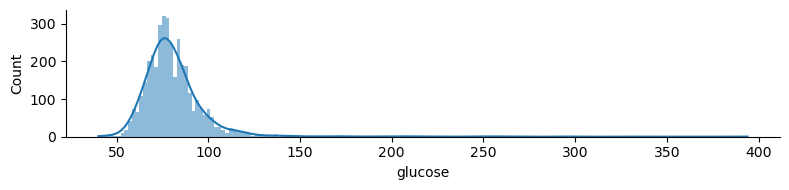

In [7]:
sns.displot(df['glucose'].dropna(), kde=True, height=2, aspect=4, linewidth=0)
plt.show()

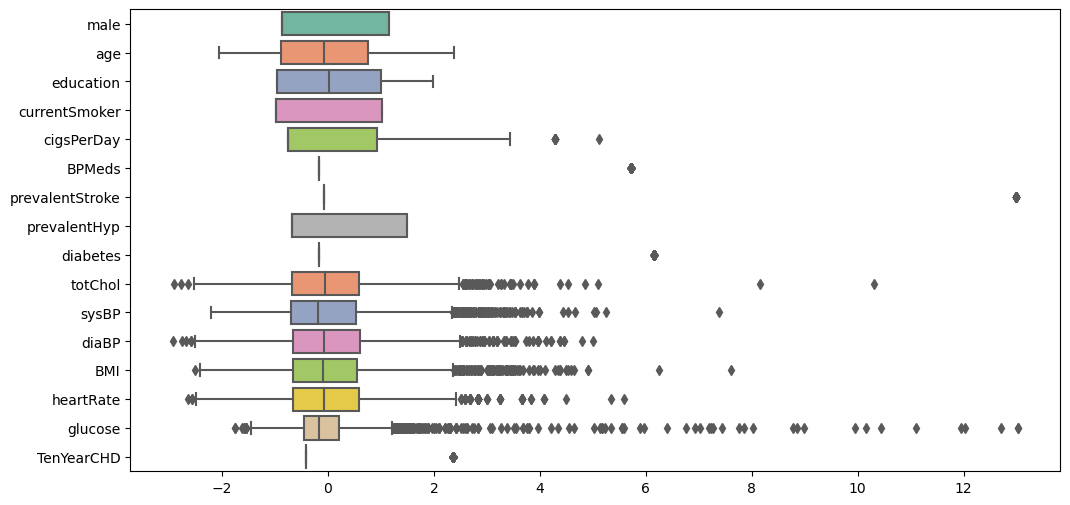

In [8]:
ss = StandardScaler()
cols = list(df.columns)
plt.figure(figsize=(12,6))
sns.boxplot(data=pd.DataFrame(ss.fit_transform(df), columns=cols), orient='h', palette='Set2')
plt.show()

In [9]:
q1 = df['glucose'].quantile(0.25)
q3 = df['glucose'].quantile(0.75)
iqr = q3-q1

df = df[~(df['glucose']>=(q3+1.5*iqr))]

In [10]:
q1 = df['totChol'].quantile(0.25)
q3 = df['totChol'].quantile(0.75)
iqr = q3-q1

df = df[~(df['totChol']>=(q3+1.5*iqr))]

In [11]:
df.shape

(4008, 16)

In [12]:
df = df.fillna(method='ffill')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4008 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4008 non-null   int64  
 1   age              4008 non-null   int64  
 2   education        4008 non-null   float64
 3   currentSmoker    4008 non-null   int64  
 4   cigsPerDay       4008 non-null   float64
 5   BPMeds           4008 non-null   float64
 6   prevalentStroke  4008 non-null   int64  
 7   prevalentHyp     4008 non-null   int64  
 8   diabetes         4008 non-null   int64  
 9   totChol          4008 non-null   float64
 10  sysBP            4008 non-null   float64
 11  diaBP            4008 non-null   float64
 12  BMI              4008 non-null   float64
 13  heartRate        4008 non-null   float64
 14  glucose          4008 non-null   float64
 15  TenYearCHD       4008 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 532.3 KB


We decided to remove outliers of totChol and glucose as the boxplot indicated that outlier issue are serious for these two variables.

### Exploratory Data Analysis

In [14]:
df['TenYearCHD'].value_counts(normalize=True)

0    0.856038
1    0.143962
Name: TenYearCHD, dtype: float64

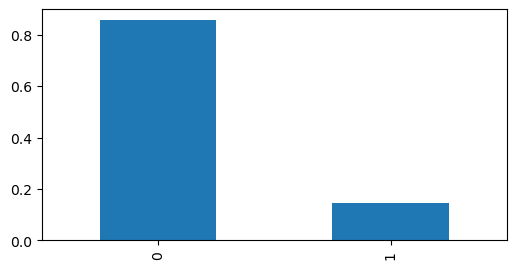

In [15]:
plt.figure(figsize=(6, 3))
df['TenYearCHD'].value_counts(normalize=True).plot.bar()
plt.show()

The chart shows that 14.3% of the group had Heart disease.

In [16]:
#sns.pairplot(data=df.iloc[:,np.r_[0:7, 15]], hue='TenYearCHD')
#plt.show()

In [17]:
#sns.pairplot(data=df.iloc[:,np.r_[7:15, 15]], hue='TenYearCHD')
#plt.show()

In [18]:
df2 = df.loc[:, ['age', 'cigsPerDay', 'diabetes', 'totChol',
 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']]

In [19]:
#sns.pairplot(data=df2, hue='TenYearCHD')
#plt.show()

Pairplot shows univariate analysis on the diagonal and scatterpplot on the off diagonal. Since we have used CHD as hue, the plots/ color is split based on the hue.

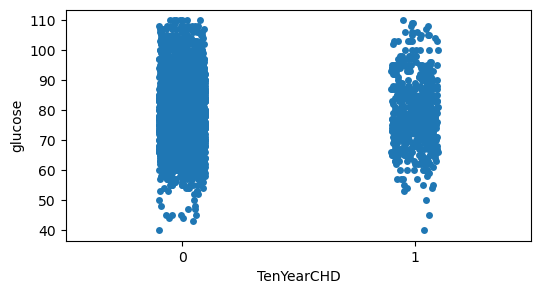

In [20]:
plt.figure(figsize=(6, 3))
sns.stripplot(data=df2, x='TenYearCHD', y='glucose')
plt.show()

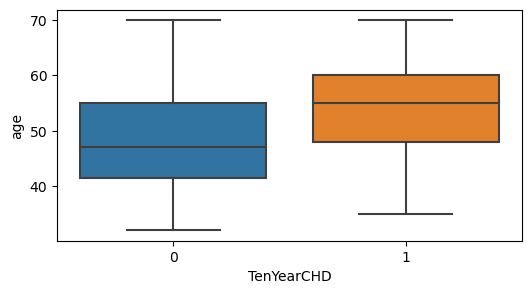

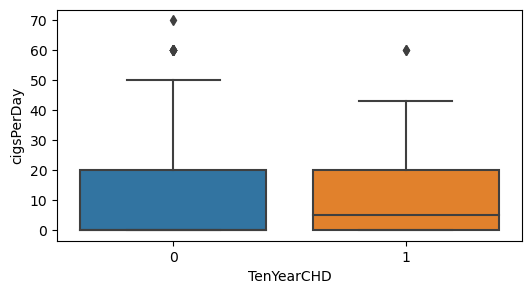

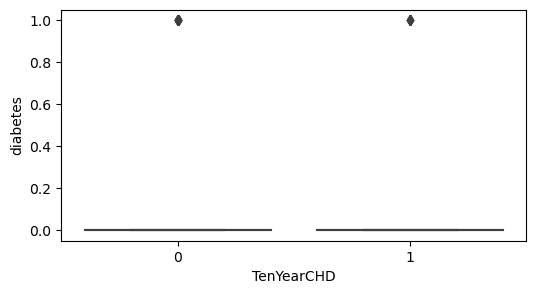

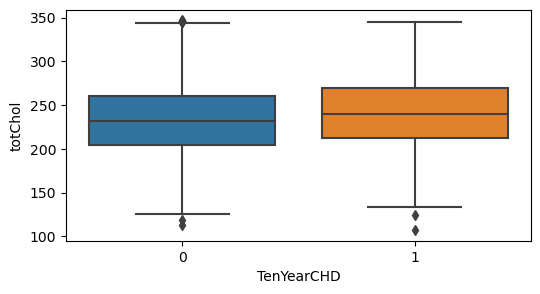

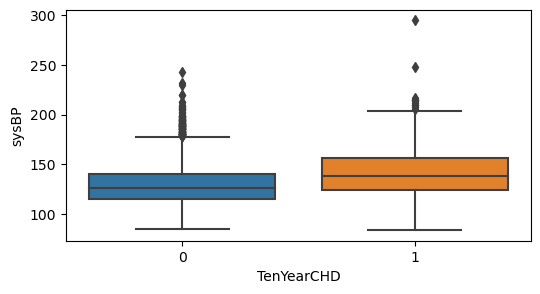

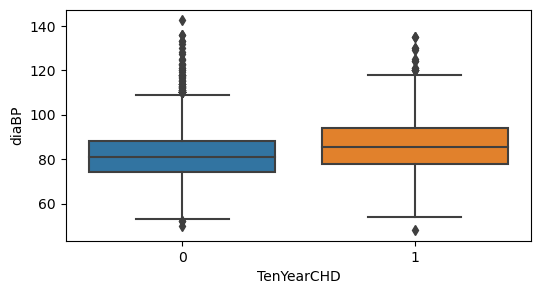

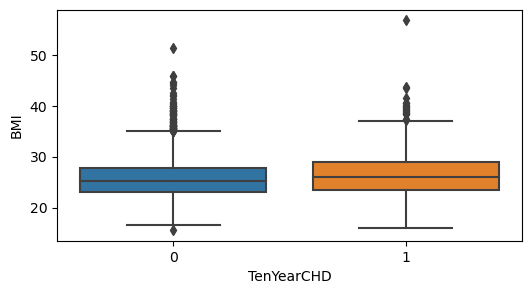

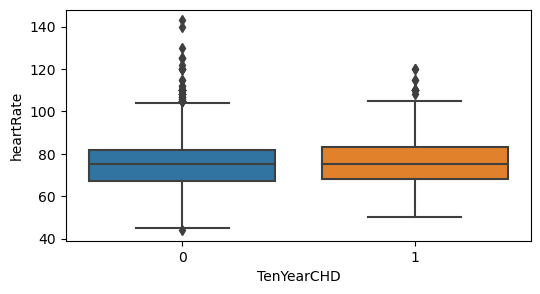

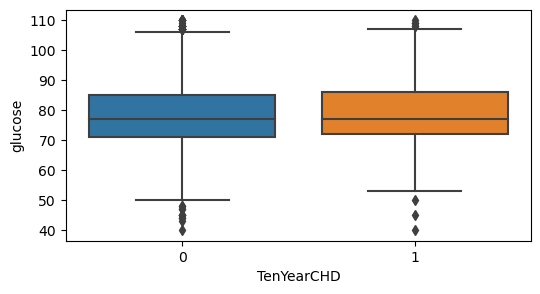

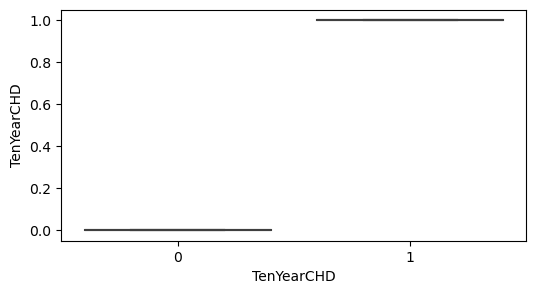

In [21]:
cols = list(df2)

for i in cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(data=df2, x='TenYearCHD', y=i)
    plt.show()

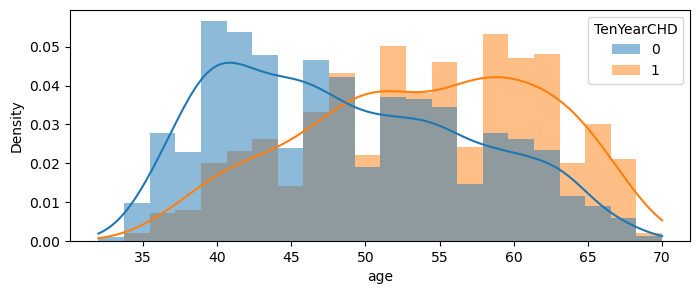

In [22]:
plt.figure(figsize=(8,3))
sns.histplot(df, x='age', hue='TenYearCHD', stat="density", kde=True, linewidth=0, common_norm=False)
plt.show()

In [23]:
df0 = df[df['TenYearCHD']==0]
df1 = df[df['TenYearCHD']==1]

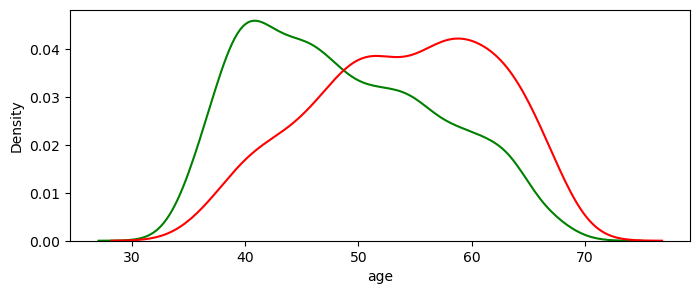

In [24]:
fig, ax = plt.subplots(figsize=(8,3))
sns.kdeplot(df0['age'], ax=ax, color='g')
sns.kdeplot(df1['age'], ax=ax, color='r')
plt.show()

### Logistic Regression - Statistics Approach

In [25]:
import statsmodels.api as sm

y = df[['TenYearCHD']]
X = df.drop('TenYearCHD', axis=1)
Xc = sm.add_constant(X)

#### VIF

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vif = [vif(Xc.values,i) for i in range(Xc.shape[1])]
pd.DataFrame({'vif': vif}, index=Xc.columns)

,vif
const,229.122037
male,1.191365
age,1.365998
education,1.050858
currentSmoker,2.504062
cigsPerDay,2.631911
BPMeds,1.096646
prevalentStroke,1.024027
prevalentHyp,2.058492
diabetes,1.007259


In [27]:
model = sm.Logit(y, Xc)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.370273
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 4008
Model:                          Logit   Df Residuals:                     3992
Method:                           MLE   Df Model:                           15
Date:                Mon, 28 Oct 2024   Pseudo R-squ.:                  0.1015
Time:                        04:23:44   Log-Likelihood:                -1484.1
converged:                       True   LL-Null:                       -1651.7
Covariance Type:            nonrobust   LLR p-value:                 2.581e-62
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.0508      0.747    -10.783      0.000      -9.514      -6.587
male                0.4894      0.104      4.688      0.000       0.285       0.694
age                 0.0662      0.006     10.223      0.000       0.054       0.079
education          -0.0131      0.047     -0.277      0.782      -0.106       0.080
currentSmoker       0.0875      0.150      0.585      0.559      -0.206       0.381
cigsPerDay          0.0192      0.006      3.277      0.001       0.008       0.031
BPMeds              0.2639      0.237      1.112      0.266      -0.201       0.729
prevalentStroke     0.8565      0.479      1.789      0.074      -0.082       1.795
prevalentHyp        0.1756      0.136      1.295      0.195      -0.090       0.441
diabetes            0.2493      0.452      0.551      0.582      -0.637       1.136
totChol             0.0011      0.001      0.899      0.369      -0.001       0.003
sysBP               0.0140      0.004      3.701      0.000       0.007       0.021
diaBP              -0.0026      0.006     -0.408      0.684      -0.015       0.010
BMI                 0.0103      0.012      0.835      0.404      -0.014       0.035
heartRate           0.0016      0.004      0.388      0.698      -0.006       0.010
glucose             0.0002      0.004      0.053      0.958      -0.008       0.009
===================================================================================
"""

In [28]:
## Backward elimination to drop insignificant variables one by one

cols = list(Xc.columns)
while len(cols)>0:
    X1 = Xc[cols]
    model = sm.Logit(y, X1).fit()
    p=model.pvalues
    p = p.drop(labels=['const'])  ## retain the constant even if it is not significant
    pmax = max(p)
    feature_pmax = p.idxmax()
    if pmax>0.05:
        cols.remove(feature_pmax)
        print(feature_pmax, 'removed with pvalue  ', pmax)
    else:
        break

selected_cols = cols
print(selected_cols)

Optimization terminated successfully.
         Current function value: 0.370273
         Iterations 7
glucose removed with pvalue   0.9576606957747212
Optimization terminated successfully.
         Current function value: 0.370273
         Iterations 7
education removed with pvalue   0.7825443373501944
Optimization terminated successfully.
         Current function value: 0.370283
         Iterations 7
heartRate removed with pvalue   0.6835819201157112
Optimization terminated successfully.
         Current function value: 0.370303
         Iterations 7
diaBP removed with pvalue   0.6751103154739726
Optimization terminated successfully.
         Current function value: 0.370325
         Iterations 7
diabetes removed with pvalue   0.5673374920002024
Optimization terminated successfully.
         Current function value: 0.370365
         Iterations 7
currentSmoker removed with pvalue   0.5482889484581237
Optimization terminated successfully.
         Current function value: 0.370409
     

In [29]:
model = sm.Logit(y, Xc[selected_cols]).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.371020
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 4008
Model:                          Logit   Df Residuals:                     4002
Method:                           MLE   Df Model:                            5
Date:                Mon, 28 Oct 2024   Pseudo R-squ.:                 0.09966
Time:                        04:23:44   Log-Likelihood:                -1487.0
converged:                       True   LL-Null:                       -1651.7
Covariance Type:            nonrobust   LLR p-value:                 5.188e-69
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -7.9679      0.388    -20.510      0.000      -8.729      -7.206
male                0.4727      0.101      4.672      0.000       0.274       0.671
age                 0.0675      0.006     10.946      0.000       0.055       0.080
cigsPerDay          0.0217      0.004      5.498      0.000       0.014       0.029
prevalentStroke     0.9460      0.471      2.006      0.045       0.022       1.870
sysBP               0.0168      0.002      7.905      0.000       0.013       0.021
===================================================================================
"""

In [30]:
params = model.params
params = pd.DataFrame(params, columns=['coeft'])
params['exp_coeft'] = np.exp(params['coeft'])
params

,coeft,exp_coeft
const,-7.967893,0.000346
male,0.472711,1.604338
age,0.067472,1.069801
cigsPerDay,0.021740,1.021978
prevalentStroke,0.945965,2.575297
sysBP,0.016783,1.016925


In [31]:
y_prob = model.predict(Xc[selected_cols])
y = y.copy()
y['y_prob'] = y_prob

In [32]:
y['y_pred'] = y['y_prob'].apply(lambda x: 1 if x>=0.5 else 0)

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

In [34]:
print('Accuracy Score: ', accuracy_score(y['TenYearCHD'], y['y_pred']))

Accuracy Score:  0.8582834331337326


In [35]:
print('Confusion Matrix: ', '\n', confusion_matrix(y['TenYearCHD'], y['y_pred']))

Confusion Matrix:  
 [[3412   19]
 [ 549   28]]


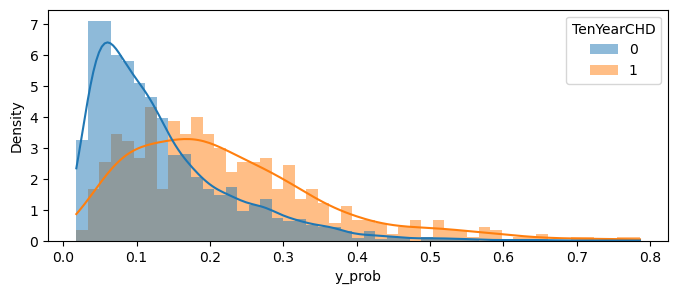

In [36]:
plt.figure(figsize=(8, 3))
sns.histplot(data=y, x='y_prob', hue='TenYearCHD', kde=True, stat="density", common_norm=False, linewidth=0)
plt.show()

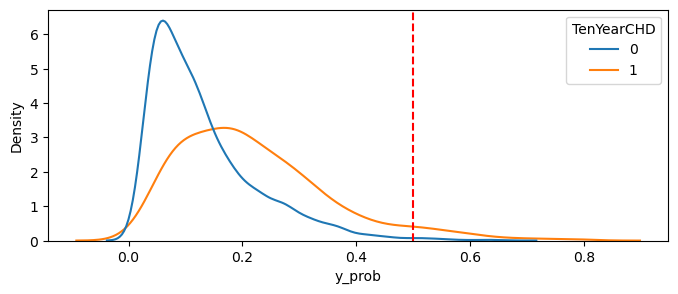

In [37]:
plt.figure(figsize=(8, 3))
sns.kdeplot(data=y, x='y_prob', hue='TenYearCHD', common_norm=False)
plt.axvline(x=0.5, color='red', linestyle='--')
plt.show()

#### ROC Analysis

AUC of Train:  0.7253366314978075


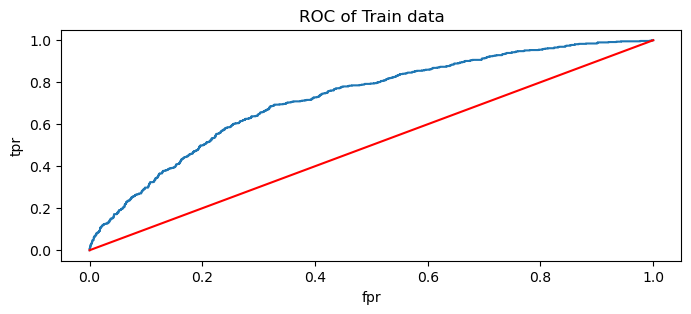

In [38]:
from sklearn.metrics import roc_auc_score, roc_curve

print ('AUC of Train: ', roc_auc_score(y['TenYearCHD'], y['y_prob']))
fpr, tpr, thresholds = roc_curve(y['TenYearCHD'], y['y_prob'])

plt.figure(figsize=(8, 3))
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, 'r-')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC of Train data')
plt.show()

#### Interpreting AUC value

In [39]:
y2 = y.copy()
y2 = y2.drop('y_pred', axis=1)

In [40]:
## creating all possible pairs of 0s and 1s
y0 = y2[y2['TenYearCHD']==0]
y0 = y0.rename(columns={'TenYearCHD':'TenYearCHD0', 'y_prob':'y_prob0'})
y1 = y2[y2['TenYearCHD']==1]
y1 = y1.rename(columns={'TenYearCHD':'TenYearCHD1', 'y_prob':'y_prob1'})
y01 = pd.merge(y0, y1, how='cross')
y01.head(3)

,TenYearCHD0,y_prob0,TenYearCHD1,y_prob1
0,0,0.075467,1,0.224923
1,0,0.075467,1,0.527340
2,0,0.075467,1,0.305261


In [41]:
print(y0.shape, y1.shape, y01.shape)

(3431, 2) (577, 2) (1979687, 4)


In [42]:
## classifying all rows into concordant (prob(0)<prob(1)), discordant(prob(0)<prob(1)) or equal((prob(0)=prob(1))
def f(row):
    if row['y_prob0'] == row['y_prob1']:
        val = 'E'
    elif row['y_prob0'] < row['y_prob1']:
        val = 'C'
    else:
        val = 'D'
    return val

y01['concord'] = y01.apply(f, axis=1)

In [43]:
y01.head(2)

,TenYearCHD0,y_prob0,TenYearCHD1,y_prob1,concord
0,0,0.075467,1,0.224923,C
1,0,0.075467,1,0.527340,C


In [44]:
y01['concord'].value_counts(normalize=1)

C    0.725317
D    0.274643
E    0.000040
Name: concord, dtype: float64

#### Note that proportion of concordance = AUC value